In [2]:
# Gerekli kütüphaneler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.experimental import enable_iterative_imputer  # ✳️ Bu satır şart
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Veriyi yükle
df = pd.read_csv("hmeq.csv")

# Eksik kategorik verileri doldur
df['REASON'] = df['REASON'].fillna("Unknown")
df['JOB'] = df['JOB'].fillna("Unknown")

# Sayısal kolonları impute et (BAD hariç)
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop('BAD')
imputer = IterativeImputer(random_state=42)
df[num_cols] = imputer.fit_transform(df[num_cols])

# Kategorik değişkenleri sayısallaştır
df['REASON'] = LabelEncoder().fit_transform(df['REASON'])
df['JOB'] = LabelEncoder().fit_transform(df['JOB'])

# Gözetimsiz öğrenme için BAD kolonunu çıkar
X_unsup = df.drop('BAD', axis=1)

# Sayısal verileri ölçekle
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_unsup)


c:\Users\ahmet\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


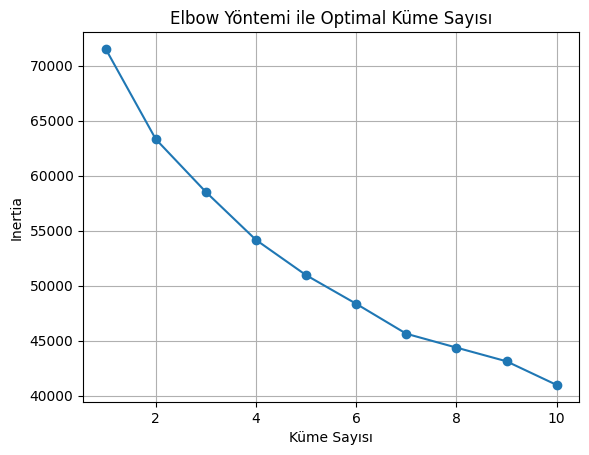

In [3]:
# Elbow yöntemiyle ideal K sayısını belirle
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Grafikle elbow noktası göster
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow Yöntemi ile Optimal Küme Sayısı")
plt.xlabel("Küme Sayısı")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

# 3 küme ile KMeans uygulaması
kmeans = KMeans(n_clusters=3, random_state=42)
df['KMEANS_CLUSTER'] = kmeans.fit_predict(X_scaled)


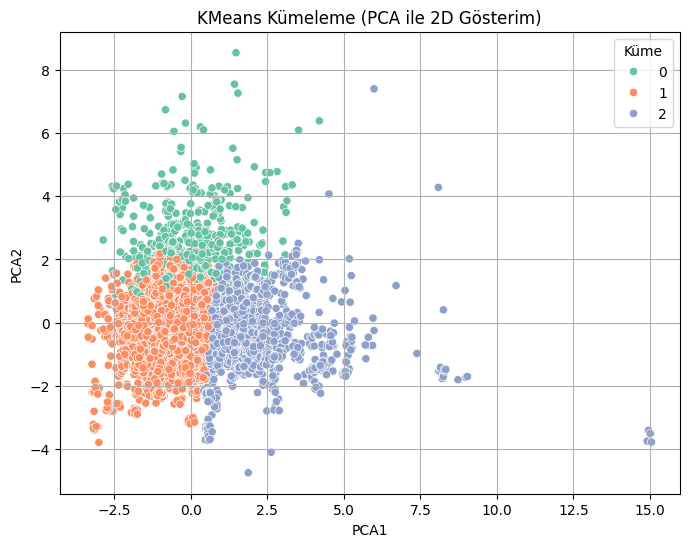

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,PCA1,PCA2
KMEANS_CLUSTER,,,,,,,,,,,,,,,
0,0.59,17820.68,60255.91,88046.08,0.27,1.70,7.69,1.69,2.18,149.07,3.48,24.38,36.31,0.01,2.39
1,0.17,15889.39,53185.84,79414.70,0.42,2.15,8.92,0.12,0.25,165.83,0.88,18.35,32.63,-0.72,-0.19
2,0.14,26514.34,124513.71,169658.30,0.32,2.19,9.77,0.11,0.33,227.06,1.13,28.11,36.24,2.00,-0.41


In [4]:
# PCA ile 2 boyuta indir ve görselleştir
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
df["PCA1"], df["PCA2"] = pca_result[:, 0], pca_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="KMEANS_CLUSTER", palette="Set2")
plt.title("KMeans Kümeleme (PCA ile 2D Gösterim)")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend(title="Küme")
plt.grid(True)
plt.show()

# Her kümenin ortalama profiline bakalım
df.groupby("KMEANS_CLUSTER").mean().round(2)
